# Preliminary Visualization: Sample Data

Note that you may have to download a package called basemap. This can easily be done by running 'conda install basemap'. It also installs the necessary dependencies.

In [7]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from mpl_toolkits.basemap import Basemap

from pylab import rcParams
rcParams['figure.figsize'] = 15, 15

**Tangent**: Interesting visualization on New York traffic:
    http://www.wired.com/2010/05/ff_komanoff_traffic/

#### Columns (Portuguese to English)
    Contem data do evento --> date of event (edate)
    Data do AVL, --> date of AVL (avldate)
    Codigo de linha AVL --> AVL line code (lc)
    Latitude --> lat
    Longitude --> lon
    Identificador AVL --> identifier AVL (avlid)


In [115]:
rawdf = pd.read_csv('raw_data/registro-de-posicao-a-data.csv', header=None, names=['Event Date', 'AVL Date', 'Line Code', 'lat', 'lon', 'Identifier'])
rawdf.head()

,Event Date,AVL Date,Line Code,lat,lon,Identifier
0,2013-08-24 18:59:34.803,2013-08-24 18:16:19.000,34766,-23.736918,-46.776485,41292
1,2013-08-24 18:59:34.790,2013-08-24 00:35:59.000,1428,-23.538513,-46.753928,14518
2,2013-08-24 18:59:34.820,2013-08-24 18:48:57.000,33146,-23.535275,-46.582367,35389
3,2013-08-24 18:59:34.837,2013-08-24 00:34:10.000,1663,-23.639893,-46.601290,11145
4,2013-08-24 18:59:34.843,2013-08-24 00:34:23.000,1354,-23.541658,-46.510520,55986


### How big is the dataset?
Quick cleaning for invalid lat/lon data. Some have coordinates of (0,0).

In [141]:
print rawdf.shape
df = rawdf[rawdf.lat < 0]
df = df.reset_index(drop=True) # update after dropped rows
df.shape

(200000, 6)


(193907, 6)

#### Is the identifier column unique? What does it represent?

The identifier column most likely identifies a bus.

In [161]:
dflc = df.groupby('Line Code')
dflc.count()[:10]

,Event Date,AVL Date,lat,lon,Identifier
Line Code,,,,,
1,103,103,103,103,103
4,526,526,526,526,526
5,53,53,53,53,53
6,63,63,63,63,63
8,313,313,313,313,313
9,4,4,4,4,4
10,5,5,5,5,5
11,5,5,5,5,5
12,25,25,25,25,25


In [143]:
len(df['Identifier'].unique())

13470

In [144]:
len(df['Line Code'].unique())

2173

### Lat/Lon Plot of AVL Data

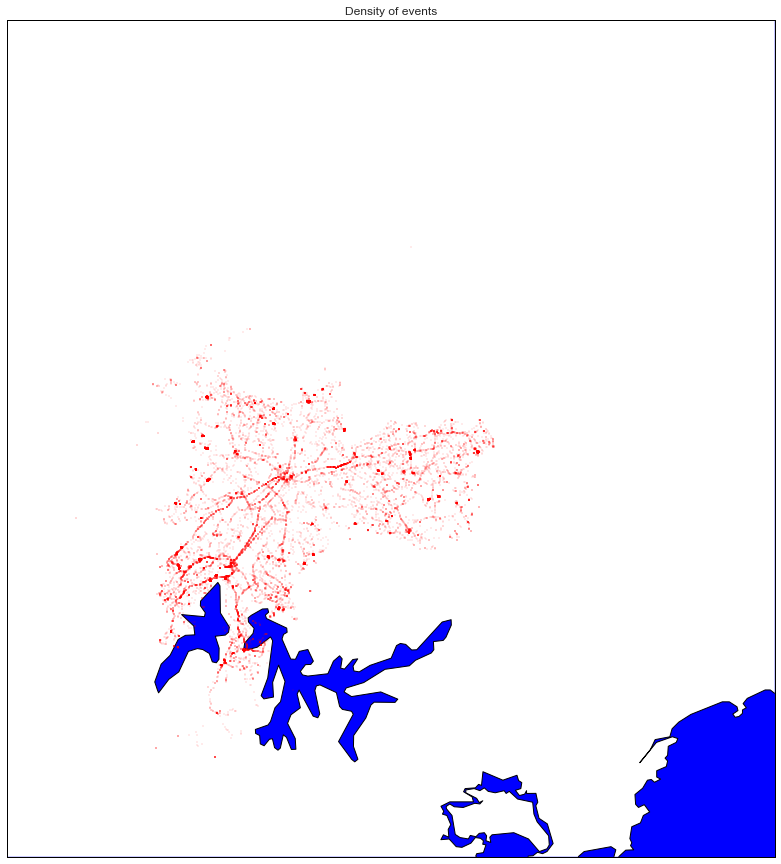

In [164]:
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='merc',llcrnrlat=-24,urcrnrlat=-23,\
            llcrnrlon=-47,urcrnrlon=-46,resolution='h')
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents(color='white',lake_color='blue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,10.))
m.drawmeridians(np.arange(-180.,181.,10.))
m.drawmapboundary(fill_color='blue')
plt.title("Density of events")

for x in range(30000):
    m.plot(df.lon[x],df.lat[x],'ro',latlon=True,ms=1,alpha=.4)

# one_route = df[df['Line Code'] == 4]
# for idx, ed, ad, lc, datalat, datalon, ident in one_route.itertuples():
#     print datalat, datalon
#     m.plot(datalat, datalon, 'ro', latlon=True, ms=100., marker='D')    
    
plt.show()

In [ ]:
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='merc',llcrnrlat=-24,urcrnrlat=-23,\
            llcrnrlon=-47,urcrnrlon=-46,resolution='h')
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents(color='white',lake_color='blue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,10.))
m.drawmeridians(np.arange(-180.,181.,10.))
m.drawmapboundary(fill_color='blue')
plt.title("Density of events")

for x in range(30000):
    m.plot(df.lon[x],df.lat[x],'ro',latlon=True,ms=1,alpha=.4)

# one_route = df[df['Line Code'] == 4]
# for idx, ed, ad, lc, datalat, datalon, ident in one_route.itertuples():
#     print datalat, datalon
#     m.plot(datalat, datalon, 'ro', latlon=True, ms=100., marker='D')    
    
plt.show()

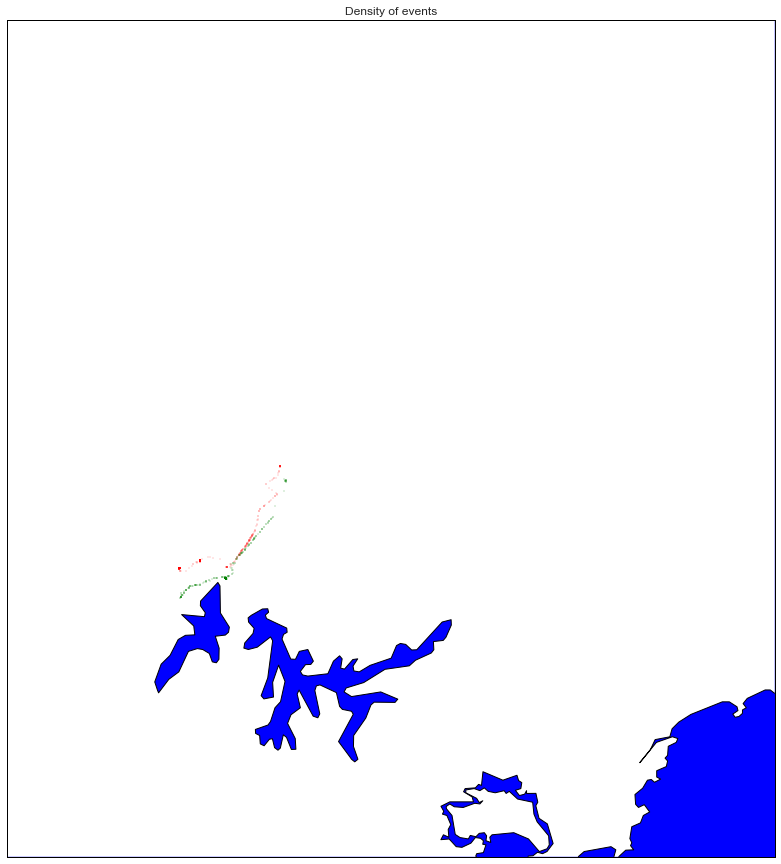

In [162]:
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='merc',llcrnrlat=-24,urcrnrlat=-23,\
            llcrnrlon=-47,urcrnrlon=-46,resolution='h')
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents(color='white',lake_color='blue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,10.))
m.drawmeridians(np.arange(-180.,181.,10.))
m.drawmapboundary(fill_color='blue')
plt.title("Density of events")

for x in range(df.shape[0]):
    if df['Line Code'][x] == 4:
        m.plot(df.lon[x],df.lat[x],'ro',latlon=True,ms=1,alpha=.5)
    if df['Line Code'][x] == 171:
        m.plot(df.lon[x],df.lat[x],'gD',latlon=True,ms=1,alpha=.5)

# one_route = df[df['Line Code'] == 4]
# for idx, ed, ad, lc, datalat, datalon, ident in one_route.itertuples():
#     print datalat, datalon
#     m.plot(datalat, datalon, 'ro', latlon=True, ms=100., marker='D')    
    
plt.show()